### Problem 1

The following `sin_a` and `sin_b` are two approaches to computing the Taylor polynomial.  The first is by-hand, and the second takes advantage of `np.polyval` to peform polynomial evaluation given a vector of coefficients.

In [2]:
def sin_a(x,k):
    """Computes the order k Taylor polynomial of sin(x)

    Parameters
    ----------
    
    x: Input values.
    k: Order of the Taylor polynomial.
    
    Returns
    -------
    
    s: Approximation of sin(x)
"""

    import numpy as np
    sign = 1;
    
    s=np.zeros(np.shape(x))
    xj=np.copy(x)
    jfact = 1.0;
    for j in range(1,k+1):
        if j % 2 == 0:
            continue
        s = s + sign*xj/jfact;
        sign = sign * -1
        jfact = jfact*(j+1)*(j+2)
        xj = xj * x * x
    return s

In [54]:
def sin_b(x,k):
    import numpy as np

    # Array of Taylor coefficients
    c = np.zeros((k+1,))

    j_fact = 1.0
    sign = 1;

    j=1
    while j <= k:
        c[k-j] = sign/j_fact
        sign *= -1
        j_fact = j_fact*(j+1)*(j+2)
        j += 2
 
    return np.polyval(c,x)

The following is a plot of the difference of the order 14 Taylor polynomial 
and `numpy`'s computation of sin.  The difference is less than the requested error.

Note, however, that this amount of effort is wasteful, due to the symmetry of $\sin$.  We could instead use an order 9 polynomial on $[0,\pi/2]$ to achieve the same level of accuracy, and then compute other values of $\sin$ based off of values in this interval. 

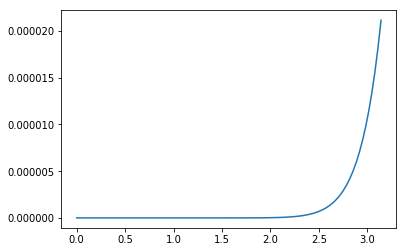

In [56]:
import matplotlib.pyplot as pp
import numpy as np
x=np.linspace(0,np.pi,100)
y=sin_b(x,14)
pp.plot(x,y-np.sin(x))

### Problem 3

In [94]:
def bisect(f,a,b,epsilon):
    """ Find a root of f(x) on the interval [a,b]
    
    Parameters
    ----------
    
    f: The function of one variable to find a root of
    a, b: The endpoints of the interval [a,b] containing the root
    epsilon: The root will be located to within distance epsilon
    
    Returns
    -------
    
    Approximate root location.
    """
    import numpy as np
    if a>b:
        c = b
        b = a
        a = c
    h = b-a
    
    f0 = f(a)
    f1 = f(b)
    
    if np.sign(f0) == np.sign(f1):
        raise Exception("Interval is not a bracket for root finding.")

    h = b-a
    while h > epsilon:
        c = (a+b)/2
        fmid = f(c)
        if np.sign(fmid) == np.sign(f0):
            a = c
            f0 = fmid            
        else:
            b = c
            f1 = fmid
        h *= 0.5
    return a

Let's test it against finding the square root of 2.

In [72]:
f = lambda x: x*x -2

In [77]:
sqrt2 = bisect(f,1,2,1e-8)

In [78]:
abs(sqrt2-np.sqrt(2))

1.8514925148593875e-09

That's just less than the desired tolerance.  Good.

### Problem 4

In [105]:
def newton(f,fp,x0,epsilon):
    
    x = x0
    for n in range(1000):
        fx = f(x)
        fpx = fp(x)
        if fpx == 0:
            raise Exception("Zero derivative encountered")
        x_next = x - fx/fpx
        if abs(x_next-x) < epsilon:
            return (x_next,n+1)
        x = x_next
    raise Exception("Root not found")


Let's test it to find the square root of 2.

In [98]:
f = lambda x: x*x-2

In [106]:
fp = lambda x: 2*x

In [107]:
sqrt2,N = newton(f,fp,2,1e-12)

Verify the root is within the desired tolerance.

In [108]:
abs(sqrt2-np.sqrt(2))

2.220446049250313e-16

How many iterations did that take?

In [109]:
N

6

Six iterations.  Cool.